# COURSE: Master math by coding in Python
# SECTION: Calculus
# VIDEO: Calculus bug hunt! (This is the solutions file.)


### https://www.udemy.com/course/math-with-python/?couponCode=202312
#### INSTRUCTOR: Mike X Cohen (http://sincxpress.com)

This code roughly matches the code shown in the live recording: variable names, order of lines, and parameter settings may be slightly different.

<a target="_blank" href="https://colab.research.google.com/github/mikexcohen/MathWithPython/blob/main/calculus/mathWithPython_calc_bugHunt_SOL.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# import libraries
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from IPython.display import display,Math

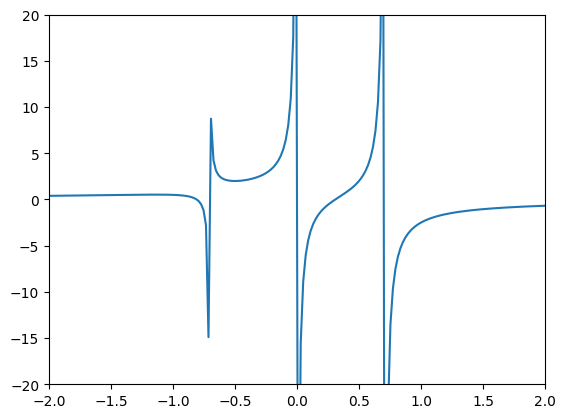

In [2]:
# evaluate a function in a range
from sympy.abc import x

fx = (4*x**3 + 2*x**2 - x) / (-4*x**4 + 2*x**2)

xrange = np.linspace(-2,2,200)
fxx = sym.lambdify(x,fx)

plt.plot(xrange,fxx(xrange))
plt.ylim([-20,20])
plt.xlim(xrange[[0,-1]])
plt.show()

<IPython.core.display.Math object>

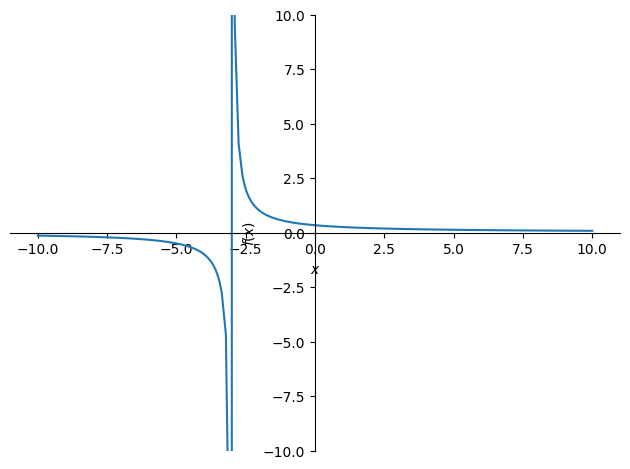

In [3]:
# compute the limit
x = sym.symbols('x')
fx = 1/(x+3)

lim_pnt = -3
lim = sym.limit(fx,x,lim_pnt,dir='+')

display(Math('\\lim_{x\\to %g^+} %s = %s' %(lim_pnt,sym.latex(fx),sym.latex(lim))))
p = sym.plotting.plot(fx,show=False)
p.ylim = [-10,10]
p.show()

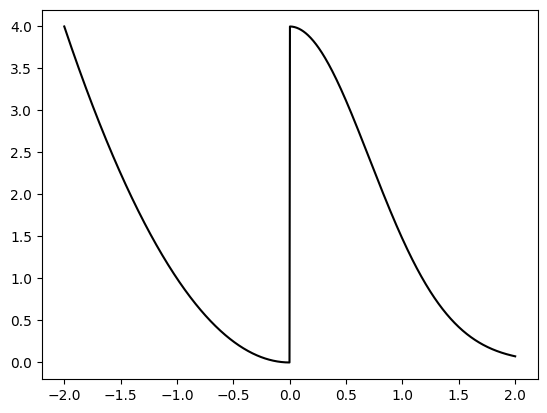

In [4]:
# piece-wise function
from sympy.abc import x

piece1 = x**2
piece2 = 4*sym.exp(-x**2)

# put them together with conditions
fx = sym.Piecewise( (piece1,x<0) , (piece2,x>=0) )

# evaluate the function in a range
xx = np.linspace(-2,2,1000)
fxx = sym.lambdify(x,fx)

# show it in a plot
plt.plot(xx,fxx(xx),'k')

plt.show()

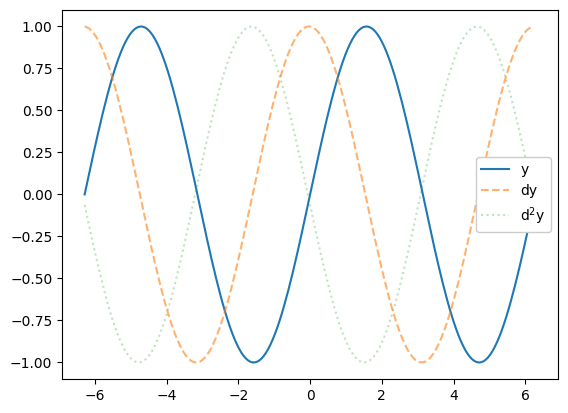

In [5]:
# show the first and second derivatives of sin(x)
x = np.linspace(-2*np.pi,2*np.pi,200)
dt = np.diff(x[0:2])

y = np.sin(x)
dy = np.diff(y)
ddy = np.diff(y,2)

plt.plot(x,y,label='y')
plt.plot(x[0:-1],dy/dt,'--',label='dy',alpha=.6)
plt.plot(x[0:-2],ddy/dt**2,':',label='d$^2$y',alpha=.3)

plt.legend(framealpha=1)
plt.show()

The critical points are: [-1, 0, 1]


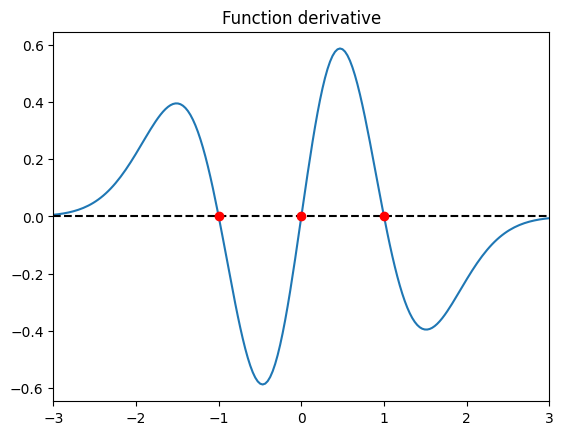

In [6]:
# Compute critical points using sympy

x = sym.symbols('x')
fx = x**2 * sym.exp(-x**2)

# derivative in sympy, solve
dfx = sym.diff(fx,x)
critpoints = sym.solve(dfx)
print('The critical points are: ' + str(critpoints))


# plot the function derivative and its critical points
y = sym.lambdify(x,dfx)
xx = np.linspace(-3,3,200)

plt.plot(xx,y(xx))
plt.plot([-3,3],[0,0],'k--')
plt.xlim([-3,3])

for i in critpoints:
  plt.plot(i,0,'ro')

plt.title('Function derivative')
plt.show()

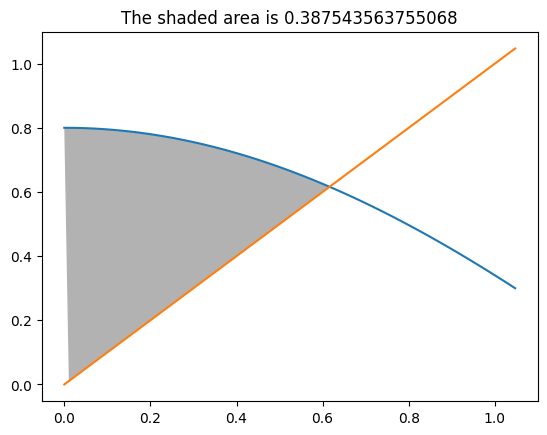

In [9]:
# Compute the area between two curves (not the same thing as Between Two Ferns)
from matplotlib.patches import Polygon


x = sym.symbols('x')
f1sym = sym.cos(x)
f2sym = x

xx = np.linspace(0,np.pi/3,100)
f1 = np.cos(xx)
f2 = xx

fintersect = np.argmin(abs(f1-f2))

# compute area
A = sym.integrate(f1sym-f2sym,(x,xx[0],xx[fintersect]))

traceX = np.concatenate((xx[0:fintersect],xx[fintersect:0:-1]))
traceY = np.concatenate((f1[0:fintersect],f2[fintersect:0:-1]))

points = np.vstack((traceX,traceY)).T
p = Polygon(points,facecolor='k',alpha=.3)

fig, ax = plt.subplots()
ax.add_patch(p)

plt.plot(xx,f1, xx,f2)
plt.title('The shaded area is %s' %A)
plt.show()
